In [1]:
%matplotlib inline

# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import math
from sklearn import metrics
from sklearn import preprocessing

**1. Data Extraction**

In [2]:
df = pd.read_csv("/kaggle/input/bmidataset/bmi.csv")

In [3]:
df.shape

(500, 4)

In [4]:
df.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df.tail(5)

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [8]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [9]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


**2. Exploratory Data Analysis (EDA)**

In [10]:
df['Index'].value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

In [11]:
df["Gender"].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [12]:
df['Index'] = df['Index'].replace({
    0: "Very less weight",
    1: "Underweight",
    2: "Normal weight",
    3: "Excess weight",
    4: "Obesity",
    5: "Extreme obesity"
})
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal weight
2,Female,185,110,Obesity
3,Female,195,104,Excess weight
4,Male,149,61,Excess weight


In [13]:
pd.pivot_table(
    df,index = ['Index','Gender'], 
    values = ["Height", "Weight"],
    aggfunc = {"Height": np.mean, "Weight": np.mean}
).sort_values(["Height","Weight"], ascending=False)

Height      Weight
Index            Gender                        
Very less weight Male    188.666667   51.500000
                 Female  186.571429   51.857143
Underweight      Male    185.066667   59.733333
                 Female  184.142857   58.714286
Normal weight    Male    178.035714   72.250000
Excess weight    Female  176.944444   87.722222
                 Male    174.906250   85.937500
Obesity          Female  174.338028  108.070423
                 Male    173.322034  107.813559
Normal weight    Female  171.682927   66.926829
Extreme obesity  Female  161.569892  135.526882
                 Male    160.457143  130.552381

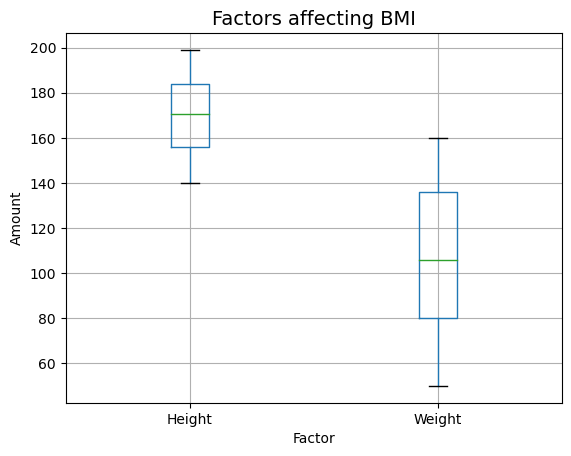

In [14]:
chart = df.boxplot(column=["Height","Weight"])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Factors affecting BMI', fontsize = 14, color = 'black')
plt.xlabel("Factor")
plt.ylabel("Amount")
plt.show()

**3. Model Classification**

In [15]:
df["Gender"]

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
495    Female
496    Female
497    Female
498      Male
499      Male
Name: Gender, Length: 500, dtype: object

In [16]:
df["Index"]

0              Obesity
1        Normal weight
2              Obesity
3        Excess weight
4        Excess weight
            ...       
495    Extreme obesity
496            Obesity
497    Extreme obesity
498    Extreme obesity
499    Extreme obesity
Name: Index, Length: 500, dtype: object

In [17]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Index'] = le.fit_transform(df['Index'])

In [18]:
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    1
499    1
Name: Gender, Length: 500, dtype: int64

In [19]:
df['Index']

0      3
1      2
2      3
3      0
4      0
      ..
495    1
496    3
497    1
498    1
499    1
Name: Index, Length: 500, dtype: int64

In [20]:
X = df.drop('Index', axis = "columns")
y = df['Index']

In [21]:
X

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61
...,...,...,...
495,0,150,153
496,0,184,121
497,0,141,136
498,1,150,95


In [22]:
y

0      3
1      2
2      3
3      0
4      0
      ..
495    1
496    3
497    1
498    1
499    1
Name: Index, Length: 500, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 3)
(400,)
(100, 3)
(100,)


In [25]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 4), 
    SVC(kernel="linear"), 
    DecisionTreeClassifier(), 
    LogisticRegression(),
    LinearDiscriminantAnalysis()
]

In [26]:
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns = log_cols)

In [27]:
for alg in classifiers:
    model = alg.fit(X_train, y_train)
    name = alg.__class__.__name__
    print("=" * 20)
    print(name)
    print('***Hasil***')
    # Holdout Validation
    acc = model.score(X_test, y_test)
    print(f"Holdout Accuracy: {acc*100}%") 
    log_entry = pd.DataFrame([[name, acc * 100]], columns = log_cols)
    log = log.append(log_entry)
print("=" * 30,"\n")

KNeighborsClassifier
***Hasil***
Holdout Accuracy: 90.0%
SVC
***Hasil***
Holdout Accuracy: 94.0%
DecisionTreeClassifier
***Hasil***
Holdout Accuracy: 88.0%
LogisticRegression
***Hasil***
Holdout Accuracy: 76.0%
LinearDiscriminantAnalysis
***Hasil***
Holdout Accuracy: 89.0%



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [28]:
linearSVC = SVC(kernel="linear")
linearSVC.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred = linearSVC.predict(X_test)
print(y_pred)

[1 1 3 1 1 1 0 1 3 1 2 3 2 1 1 0 1 0 1 3 3 0 0 3 2 4 1 3 3 0 3 1 1 1 3 5 1
 3 1 2 1 3 3 1 3 2 1 2 1 1 3 3 0 1 1 0 3 3 5 3 3 3 3 4 3 0 2 0 1 1 1 1 0 3
 3 1 3 1 1 1 1 0 3 1 1 2 1 1 1 0 0 2 0 4 0 4 3 3 5 0]


In [30]:
y_test

90     1
254    1
283    3
445    1
461    1
      ..
372    4
56     3
440    3
60     5
208    0
Name: Index, Length: 100, dtype: int64

In [31]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))

Mean Squared Error : 0.39


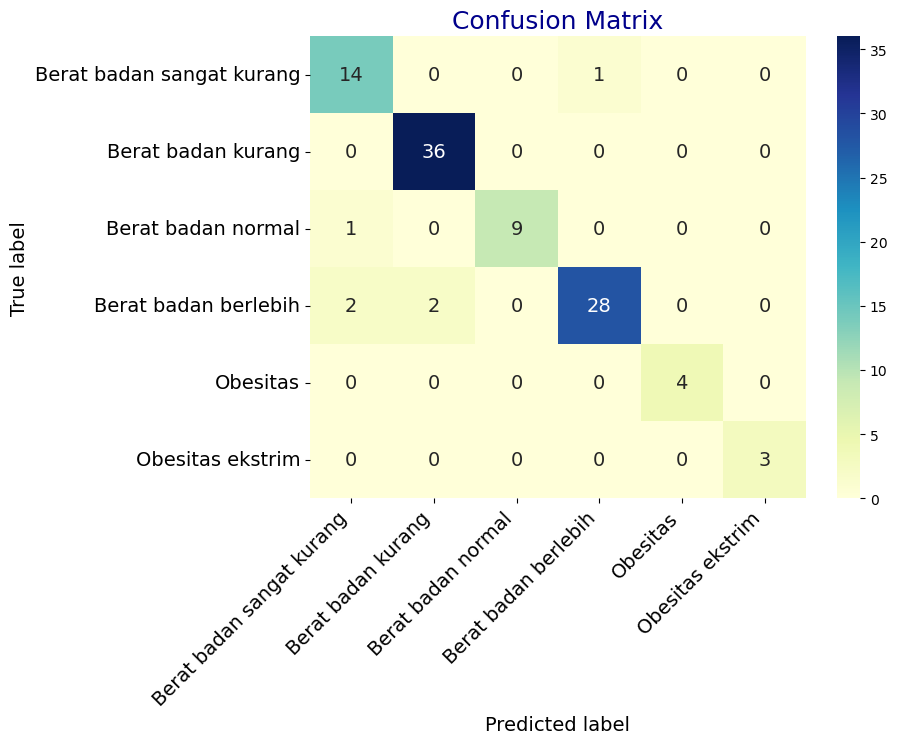

In [32]:
%matplotlib inline
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), 
                      ('Berat badan sangat kurang', 'Berat badan kurang', 'Berat badan normal', 'Berat badan berlebih', 'Obesitas', 'Obesitas ekstrim'), 
                      ('Berat badan sangat kurang', 'Berat badan kurang', 'Berat badan normal', 'Berat badan berlebih', 'Obesitas', 'Obesitas ekstrim'))

plt.figure(figsize = (8,6))
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = 14)

plt.title('Confusion Matrix', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [33]:
# # Confusion matrix
# confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# cm_display = metrics.ConfusionMatrixDisplay(
#     confusion_matrix = confusion_matrix, 
#     display_labels = ['Berat badan sangat kurang', 'Berat badan kurang', 'Berat badan normal', 'Berat badan berlebih', 'Obesitas', 'Obesitas ekstrim']
# )

# cm_display.plot()
# plt.show()

In [34]:
hasil = metrics.classification_report(y_test, y_pred)
print('Hasil Klasifikasi menggunakan SVC dengan Kernel Linear : \n')
print(hasil)

Hasil Klasifikasi menggunakan SVC dengan Kernel Linear : 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.95      1.00      0.97        36
           2       1.00      0.90      0.95        10
           3       0.97      0.88      0.92        32
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3

    accuracy                           0.94       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.94      0.94      0.94       100

